In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axisartist.axislines import SubplotZero

Figure 18.1: Diabatic Vii and adiabatic Wii potential energy curves for a two-state system

In [2]:
def gauss(sigma, x, mu):
    y = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sigma)**2)
    return y

In [3]:
x = np.linspace(-3, 3.5, 1000)
x_11 = np.linspace(-7.25, -0.75, 1000)
H_11 = x_11**2
H_22 = 1/(1 + np.exp(-x))

x_12 = np.linspace(-2, 2, 1000)
x_gauss = np.linspace(-3, 3, 1000)
H_12 = gauss(0.75, x_gauss, 0)

y_avoid_top = 0.11*x**2
y_avoid_bottom = -0.08*(x**2)

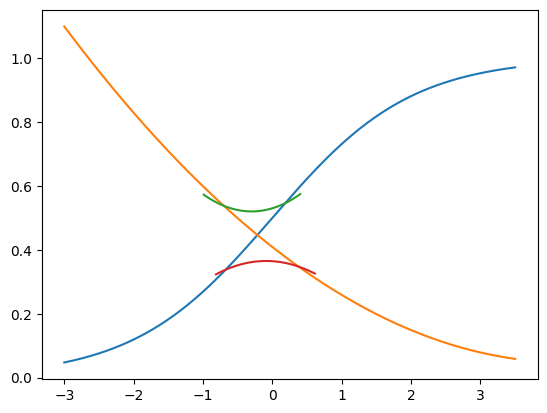

In [4]:
plt.plot(x, H_22)
plt.plot(x, (H_11/50)+H_22[0])
plt.plot(x[355:570]-0.3, y_avoid_top[355:570]+0.52)
plt.plot(x[350:570]-0.09, y_avoid_bottom[350:570]+0.365)
# plt.plot(x_12, H_12)

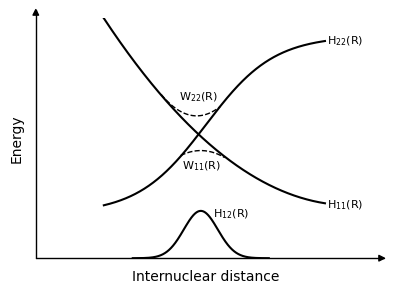

In [5]:
fig = plt.figure(figsize = (4,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(x+5, (H_11/50)+H_22[0]+0.25, color = 'k')
ax.plot(x+5, H_22+0.25, color = 'k')
ax.plot(x_12+4.85, H_12*0.5, color = 'k')
ax.text(8.55, 1.26, r'H$_{22}$(R)', fontsize = 8, va = 'top')
ax.text(8.55, 0.26, r'H$_{11}$(R)', fontsize = 8, va = 'bottom')
ax.text(5.2, 0.25, r'H$_{12}$(R)', fontsize = 8, va = 'center')

ax.plot(x[300:570]+4.73, y_avoid_top[300:570]+0.8, color = 'k', ls = '--', lw = 1)
ax.plot(x[370:570]+4.85, y_avoid_bottom[370:570]+0.605, color = 'k', ls = '--', lw = 1)
ax.text(4.2, 0.89, r'W$_{22}$(R)', fontsize = 8)
ax.text(4.3, 0.5, r'W$_{11}$(R)', fontsize = 8)

ax.set_xlim(0, 10)
ax.set_ylim(0, 1.35)

ax.set_xlabel('Internuclear distance')
ax.set_ylabel('Energy')

plt.tight_layout()
plt.savefig('avoidedxing.png', dpi = 150)
plt.show()